<a href="https://colab.research.google.com/github/gustavoramos82/Expectativa-de-Vida/blob/main/Expectativa_de_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimativa sobre expectativa de vida

## Etapa 1 - Entendimento do negócio

Neste dataset, o objetivo é construir um modelo de regressão que faça a estimativa da expectativa de vida

## Etapa 2 - Entendimento dos dados

In [ ]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.feature_selection import RFE

In [ ]:
def rmse(y_true,y_pred): # para calcular o rmse
  return np.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
# Importando o arquivo csv
vida = pd.read_csv('Life Expectancy Data.csv')
vida.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Removendo os espaços nas colunas
col = []
for i in range(len(vida.columns)):
  a = vida.columns[i]
  a = a.strip()
  col.append(a)


In [ ]:
vida.columns = col

In [ ]:
vida.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


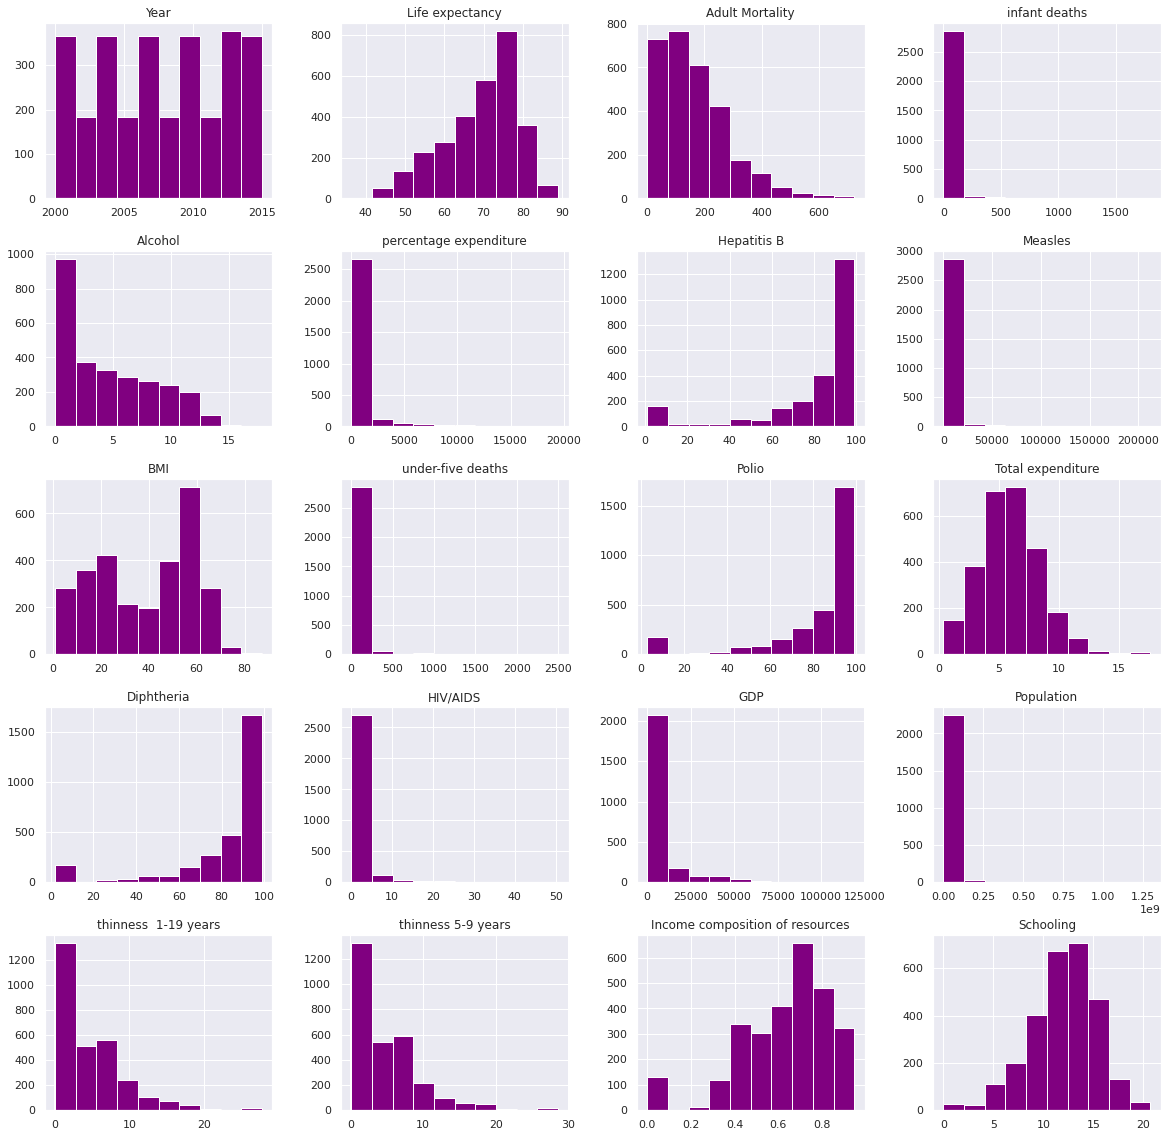

In [ ]:
sns.set(style='darkgrid',rc={'figure.figsize':(20,20)})
vida.hist(color='purple');

podemos ver a partir deste gráfico de histograma que:
- maior parte da expectativa de vida está entre 70 e 80 anos;
- o consumo de álcool e começa bem alto nos primeiro e vai diminuindo;
- O número de anos na escola está entre 10 e 15 anos em sua maior parte;
- a taxa de magreza, tanto de 5 a 9 anos, quanto de 10 a 19 anos, começa alto e vai diminuindo, mostrando que a maior parte dos paises tem um baixo indici de magreza.

In [ ]:
vida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Podemos ver que tem alguns valores nulos, do quais vão ter que ser tratados depois, além de que o unça variavel que é objeto é a status, do qual pode ser convertida para numerica em 0 e 1 já que a mesma tem dois valores.

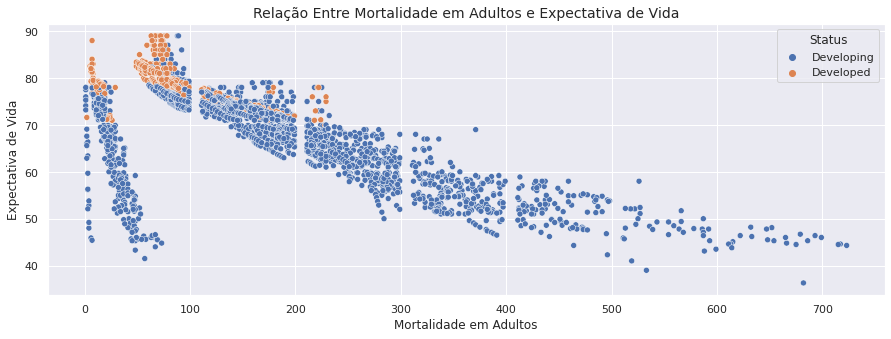

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Relação Entre Mortalidade em Adultos e Expectativa de Vida',fontsize=14)
sns.scatterplot(x='Adult Mortality',y='Life expectancy',data=vida,hue='Status')
plt.xlabel('Mortalidade em Adultos')
plt.ylabel('Expectativa de Vida');

Podemos ver que mortalidade em adultos e a expectativa de vida tem uma certa relação, o interessante é que os países desenvolvidos neste dataset tem uma tendecia de ter as maiores expectativas de vida, apesa de serem poucos, como melhor mostra no grafico abaixo.

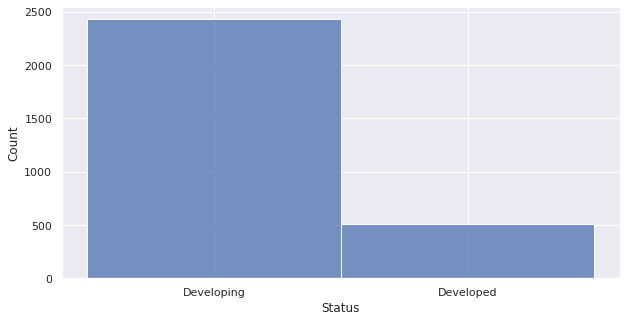

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='Status',data=vida)

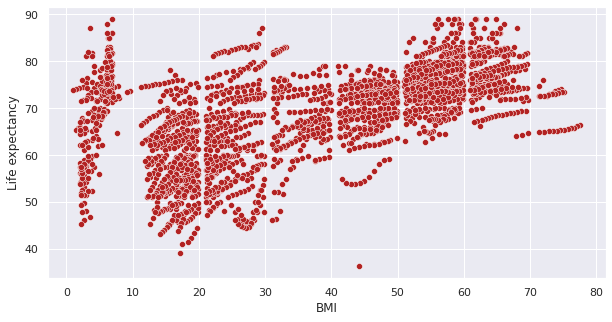

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BMI',y='Life expectancy',data=vida,color='firebrick')

Interessante falar sobre o indice de massa corporal que quanto maior é,a expectativa de vida costuma ficar em um intervalo a medida que vai crescendo.

In [ ]:
px.scatter(vida,x='thinness 5-9 years',y='Life expectancy',color='Schooling',
           title='Relação entre o indice de magreza entre criança netre 5 e 9 anos pela expectativa de vida',
           labels={'thinness 5-9 years':'Indice de magreza entre 5 e 9 anos','Life expectancy':'Expectativa de vida',
                   'Schooling':'Anos na escola'})

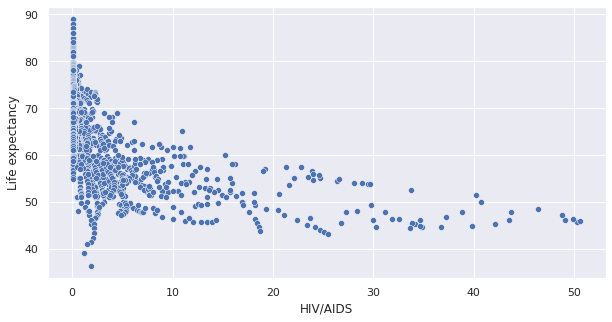

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='HIV/AIDS',y='Life expectancy',data=vida)

Podemos ver aqui que paises acima de 90 anos de exptativa de vida não tem mortes por aids, o q a tendência é diminuir conforme o número de mortes vai aumentando

Text(0, 0.5, 'Expectativa de Vida')

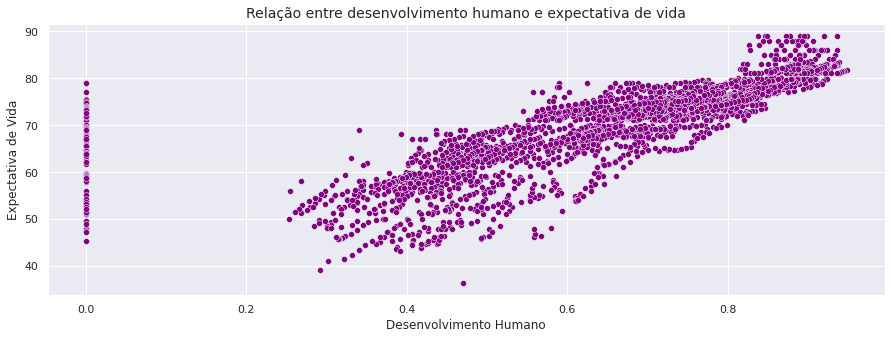

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Relação entre desenvolvimento humano e expectativa de vida',fontsize=14)
sns.scatterplot(x='Income composition of resources',y='Life expectancy',data=vida,
                color='purple')
plt.xlabel('Desenvolvimento Humano')
plt.ylabel('Expectativa de Vida')

Como podemos ver, quaanto maior é o desenvolvimento humano do pais, maior é a expectativa de vida.

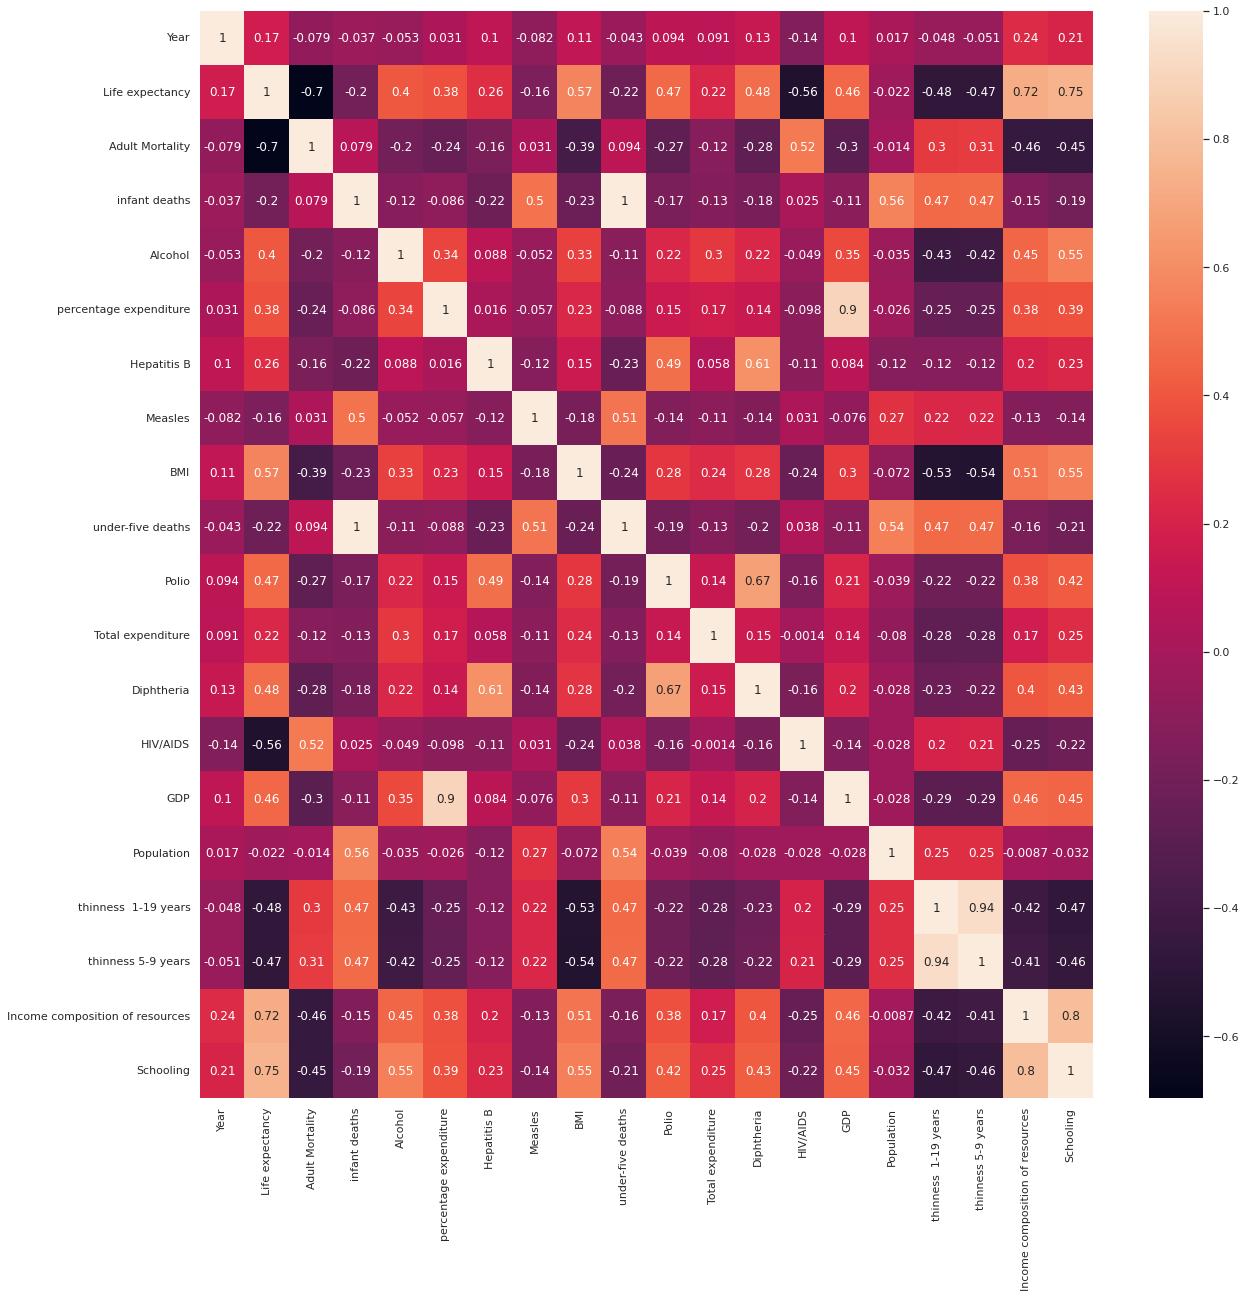

In [ ]:
pearson = vida.corr(method='pearson')
sns.heatmap(pearson,annot=True)

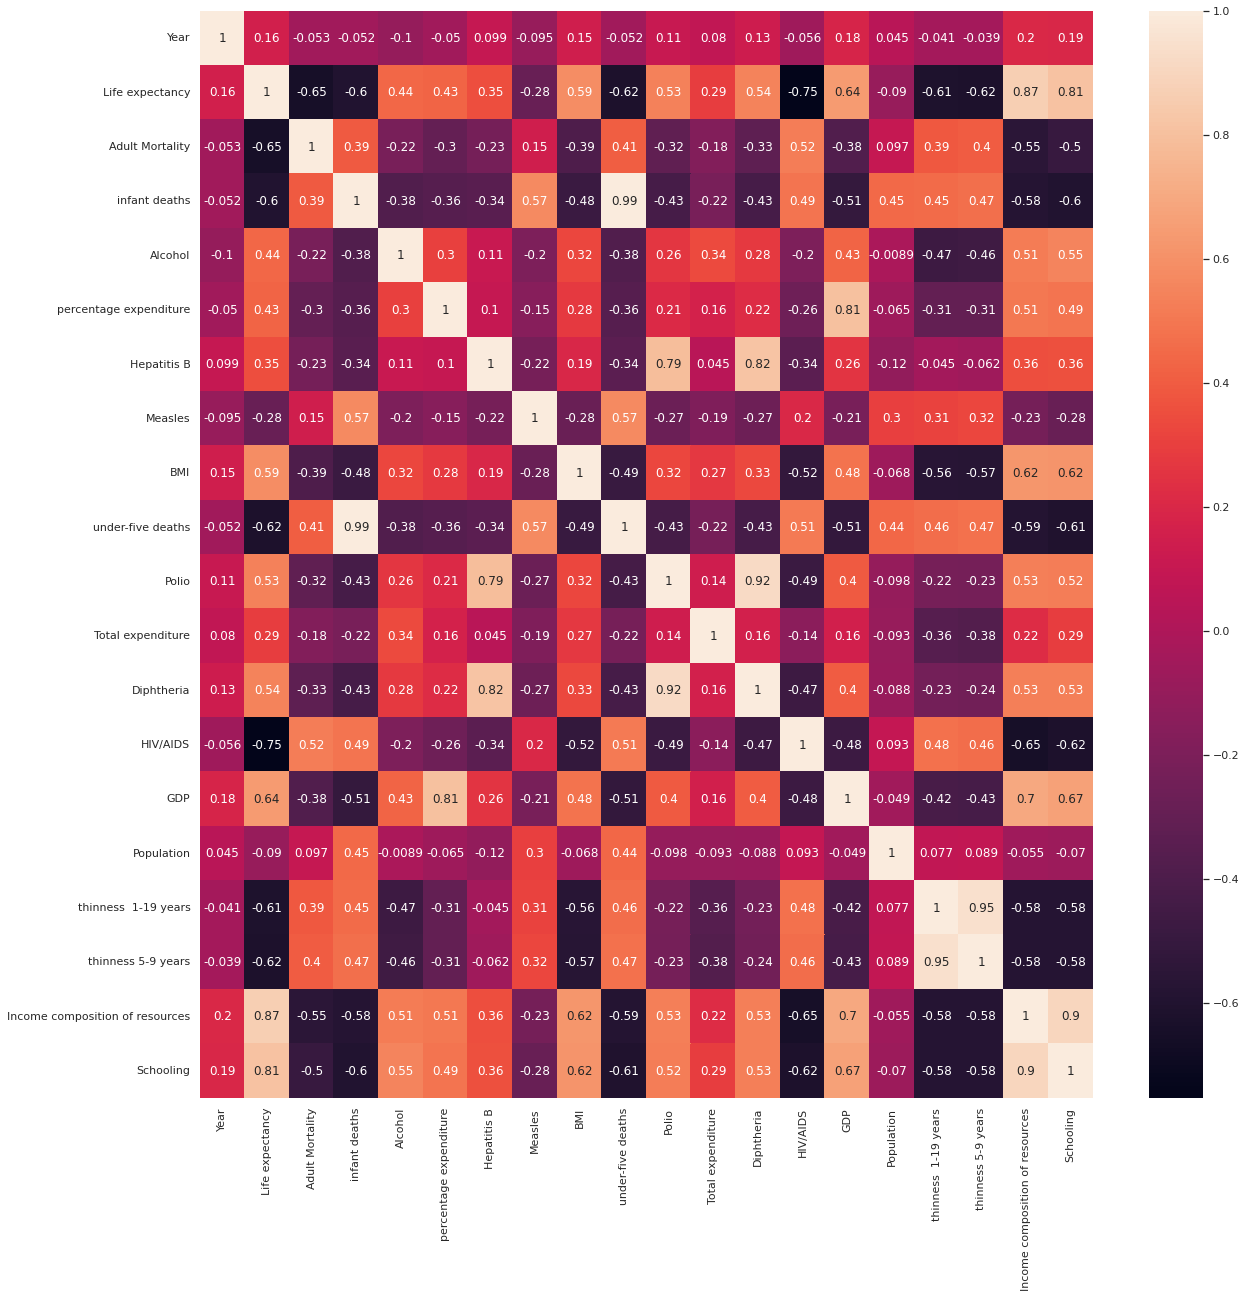

In [ ]:
spearman = vida.corr(method='spearman')
sns.heatmap(spearman,annot=True)

Como podemos ver nos dois mapa de calor, as variaveis mais importantes são a schooling, income composition of resources, hiv/aids e adulto mortalida com corrlação de pearson ou spearman maiores que 0,70, sendo positvoi ou negativo.

## Etapa 3 - Preparação dos dados

In [ ]:
# Tranformado a variavel status em uma variavel categorica 
vida['Status'] = vida['Status'].map({'Developing':0,'Developed':1})

In [ ]:
#Eliminando a variavel pais, já que são 193 acredito que não vai fazer diferença para o modelo
vida.drop('Country',axis=1,inplace=True)

In [ ]:
# verificando os dados faltantes
vida.isna().sum()


Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#colocando a média dos valores nos dados falatantes 
#no caso do target os dados faltantes vão ser descartados
for a in range(len(vida.columns)):
  if len(vida.columns[a]) > 0:
    if vida.columns[a] == 'Life expectancy':
      pass
    else:
      vida[f'{vida.columns[a]}'] = vida[f'{vida.columns[a]}'].fillna(vida[f'{vida.columns[a]}'].mean())

In [ ]:
vida.dropna(inplace=True)


## Etapa 4 - Modelagem

In [ ]:
# separando em target e atributos
x = vida.drop('Life expectancy',axis=1)
y = vida['Life expectancy']

x_std = StandardScaler().fit_transform(x)

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_std,y,test_size=0.25,random_state=10)

Aplicando Regressão Linear Múltipla

In [ ]:
cla = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),BaggingRegressor(),
       GradientBoostingRegressor()]

for i in range(len(cla)):
    cla[i].fit(x_treino,y_treino)
    y_pred = cla[i].predict(x_teste)

    print(f'Aplicando {cla[i]}, temos:')
    print('R2 score',r2_score(y_teste,y_pred))
    print('MAE',mean_absolute_error(y_teste,y_pred))
    print('RMSE',rmse(y_teste,y_pred))
    print('MAPE',mean_absolute_percentage_error(y_teste,y_pred))
    print('-*-'*15)

Aplicando LinearRegression(), temos:
R2 score 0.8012009369015145
MAE 2.9899144744086317
RMSE 4.080781116097054
MAPE 0.04602413074542956
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Aplicando KNeighborsRegressor(), temos:
R2 score 0.8973618983008202
MAE 2.009453551912568
RMSE 2.9321787345159467
MAPE 0.03063344092810902
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Aplicando DecisionTreeRegressor(), temos:
R2 score 0.9270850699210824
MAE 1.4952185792349721
RMSE 2.471407532410798
MAPE 0.022157742010302267
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Aplicando RandomForestRegressor(), temos:
R2 score 0.9573515509822292
MAE 1.153318306010928
RMSE 1.8901129389883424
MAPE 0.01729210278928285
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Aplicando BaggingRegressor(), temos:
R2 score 0.9480046022001541
MAE 1.3157650273224044
RMSE 2.086981439796398
MAPE 0.01985362061976018
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Aplicando GradientBoostingRegressor(), temos:
R2 score 0.9366813291978613
MA

In [ ]:
parametros = {'criterion':['squared_error', 'absolute_error', 'poisson'],
              'max_features':np.arange(0.1,2,0.1)
              }

grid = GridSearchCV(RandomForestRegressor(),param_grid=parametros).fit(x_std,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


135 fits failed out of a total of 285.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

In [ ]:
grid.best_params_

{'criterion': 'absolute_error', 'max_features': 0.5}

In [ ]:
rf = RandomForestRegressor(criterion='absolute_error',max_features=0.5)
rf.fit(x_treino,y_treino)
y_rf = rf.predict(x_teste)

In [ ]:
print('R2 score',r2_score(y_teste,y_rf))
print('MAE',mean_absolute_error(y_teste,y_rf))
print('RMSE',rmse(y_teste,y_rf))
print('MAPE',mean_absolute_percentage_error(y_teste,y_rf))

R2 score 0.9604705685003404
MAE 1.1454740437158473
RMSE 1.8196858517457668
MAPE 0.017316926927127472


In [ ]:
rfe = RFE(rf,n_features_to_select=12).fit(x,y)


<bound method SelectorMixin.get_feature_names_out of RFE(estimator=RandomForestRegressor(criterion='absolute_error',
                                    max_features=0.5),
    n_features_to_select=12)>

In [ ]:
rfe.get_feature_names_out()

array(['Year', 'Adult Mortality', 'Alcohol', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'HIV/AIDS', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources',
       'Schooling'], dtype=object)

Verificando os resultados com o RFE

In [ ]:
x_rfe = x[rfe.get_feature_names_out()]
x_rfe_std = StandardScaler().fit_transform(x_rfe)
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x_rfe_std,y,test_size=0.25,random_state=10)

In [ ]:
rf.fit(x2_treino,y2_treino)
y_rf2 = rf.predict(x2_teste)

In [ ]:
print('R2 score',r2_score(y_teste,y_rf2))
print('MAE',mean_absolute_error(y_teste,y_rf2))
print('RMSE',rmse(y_teste,y_rf2))
print('MAPE',mean_absolute_percentage_error(y_teste,y_rf2))

R2 score 0.9626858814214997
MAE 1.1036243169398914
RMSE 1.7679611924489371
MAPE 0.016680519247044067


# Etapa 5 - Avaliação

As variaveis mais importantes são a schooling, income composition of resources, hiv/aids e adulto mortalida com corrlação de pearson ou spearman maiores que 0,70, sendo positvoi ou negativo. Isso pode ser visto nos gráfico abixo

Text(0, 0.5, 'Expectativa de vida')

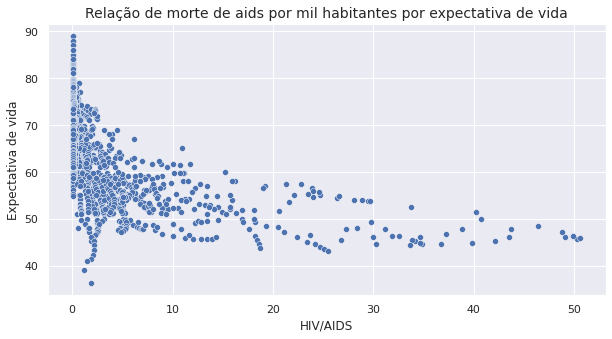

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Relação de morte de aids por mil habitantes por expectativa de vida',fontsize=14)
sns.scatterplot(x='HIV/AIDS',y='Life expectancy',data=vida)
plt.ylabel('Expectativa de vida')

Text(0, 0.5, 'Expectativa de Vida')

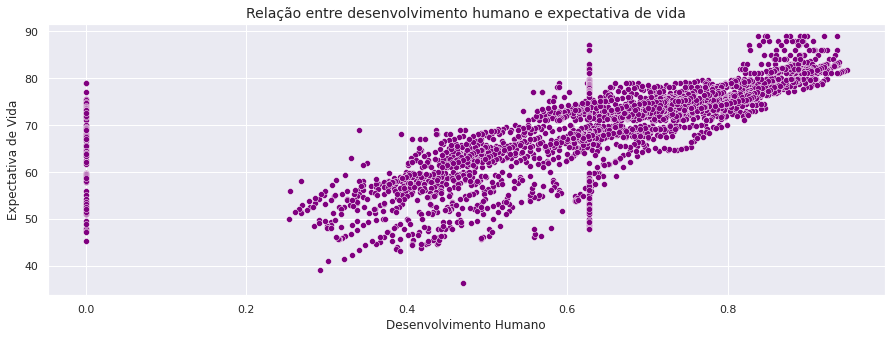

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Relação entre desenvolvimento humano e expectativa de vida',fontsize=14)
sns.scatterplot(x='Income composition of resources',y='Life expectancy',data=vida,
                color='purple')
plt.xlabel('Desenvolvimento Humano')
plt.ylabel('Expectativa de Vida')

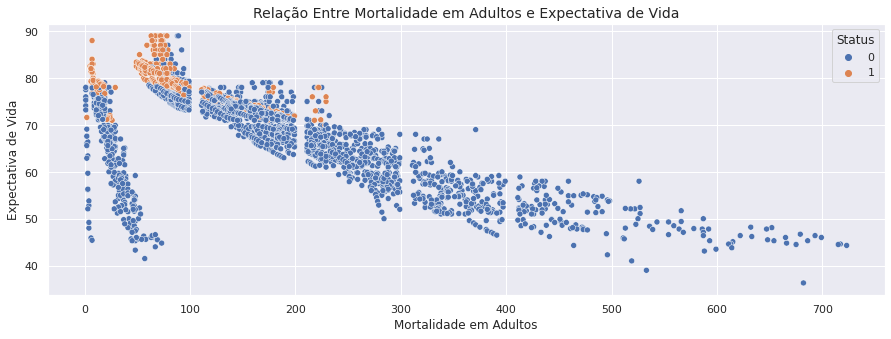

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Relação Entre Mortalidade em Adultos e Expectativa de Vida',fontsize=14)
sns.scatterplot(x='Adult Mortality',y='Life expectancy',data=vida,hue='Status')
plt.xlabel('Mortalidade em Adultos')
plt.ylabel('Expectativa de Vida');

Text(0, 0.5, 'Expectativa de vida')

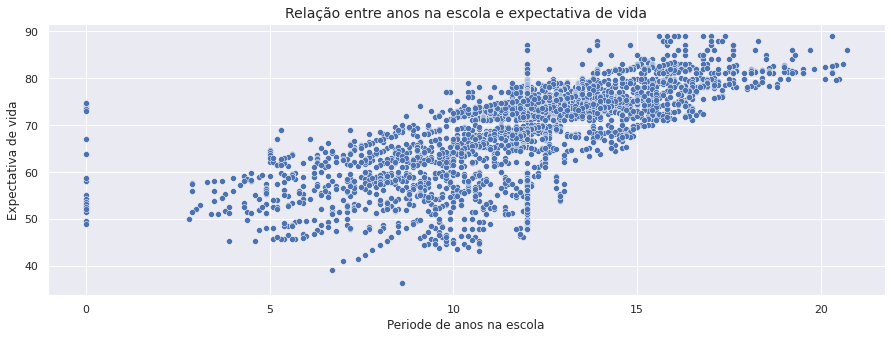

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Relação entre anos na escola e expectativa de vida',fontsize=14)
sns.scatterplot(x='Schooling',y='Life expectancy',data=vida)
plt.xlabel('Periode de anos na escola')
plt.ylabel('Expectativa de vida')

o modelo que teve a melhor perfomace foi random forest usando os parametros *{'criterion': 'absolute_error', 'max_features': 0.5}*

e obteve os seguintes resultados usando somente essas 12 colunas, o que melhora muito o processamento do que usar as 22 colunas que foram essas:

*'Year', 'Adult Mortality', 'Alcohol', 'BMI', 'under-five deaths',
       'Polio', 'Total expenditure', 'HIV/AIDS', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources',
       'Schooling'*

obtendo os seguintes resultados:

- **R2 score:** 0.9626858814214997
- **MAE:** 1.1036243169398914
- **RMSE:** 1.7679611924489371
- **MAPE:** 0.016680519247044067

Text(0, 0.5, 'Valor Predito')

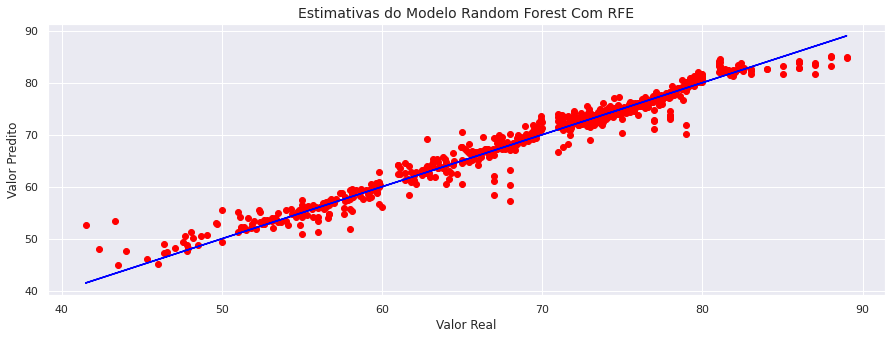

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Estimativas do Modelo Random Forest Com RFE',fontsize=14)
plt.plot(y2_teste,y2_teste,color='blue')
plt.scatter(y2_teste,y_rf2,color='red')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

Podemos ver no gráfico acima que no geral o modelo teve uma boa estimativa, com uma taxa de erro muito pequena, logo esse modelo será de grande ajuda ṕra fazer estimativas de expectativa de vida.